In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# !pip install tensorflow_privacy

import tensorflow as tf
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy_lib
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp, get_privacy_spent


# compute_rdp and get_privacy_spent. These methods are found in its analysis.rdp_accountant

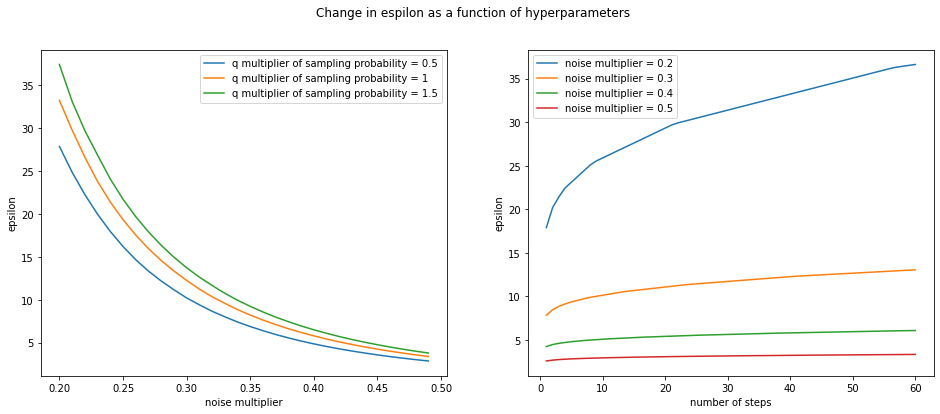

<Figure size 432x288 with 0 Axes>

In [53]:
# im niższe tym lepiej
sampling_probability = L/N  
ORDERS = [1 + x / 20 for x in range(1, 100)] + list(range(6, 64)) + [128, 256, 512]

fig, axs = plt.subplots(1,2, figsize = (16, 6))
axs = np.ravel(axs)

noises = np.arange(0.2, 0.5, 0.01)
for q in [0.5, 1, 1.5]:
  epsilons = []
  for noise in noises:
    rdp = compute_rdp(q=q * sampling_probability,
                      noise_multiplier= noise,
                      steps=40,
                      orders=ORDERS)

    epsilon = get_privacy_spent(ORDERS, rdp, target_delta=delta)[0]
    epsilons.append(epsilon)

  axs[0].plot(noises, epsilons, label = 'q multiplier of sampling probability = {}'.format(q))

axs[0].legend()
axs[0].set_xlabel('noise multiplier')
axs[0].set_ylabel('epsilon')

noises = np.arange(0.2, 0.6, 0.1)
Ts = list(range(1, 61))
for noise in noises:
  epsilons = []
  for T in Ts:
    rdp = compute_rdp(q=sampling_probability,
                      noise_multiplier= noise,
                      steps=T,
                      orders=ORDERS)

    epsilon = get_privacy_spent(ORDERS, rdp, target_delta=delta)[0]
    epsilons.append(epsilon)

  axs[1].plot(Ts, epsilons, label = 'noise multiplier = {}'.format(round(noise,1)))

axs[1].legend()
axs[1].legend()
axs[1].set_xlabel('number of steps')
axs[1].set_ylabel('epsilon')

plt.suptitle('Change in espilon as a function of hyperparameters')
plt.show()
plt.tight_layout()